<img style="float: left;;" src='Figures/alinco.png' /></a>


# <center> <font color= #000047> Módulo 2: Algoritmo Genéticos

## Introducción

Los algoritmos genéticos son métodos de optimización heurística que, entre otras aplicaciones, pueden emplearse para encontrar el valor o valores que consiguen maximizar o minimizar una función. Su funcionamiento está inspirado en la [teoría evolutiva de selección natural](https://es.wikipedia.org/wiki/Selecci%C3%B3n_natural) propuesta por Darwin y Alfred Russel: los individuos de una población se reproducen generando nuevos descendientes, cuyas características, son combinación de las características de los progenitores (más ciertas mutaciones). De todos ellos, únicamente los mejores individuos sobreviven y pueden reproducirse de nuevo, transmitiendo así sus características a las siguientes generaciones.

> *El método de algoritmo genético es solo una de las muchas estrategias de optimización heurística que existen, una alternativa común es el método de enjambre de partículas.

> *La optimización heurística no tiene por qué ser la forma de optimización más adecuada en todos los escenarios. Si el problema en cuestión puede optimizarse de forma analítica, suele ser más adecuado resolverlo de esta forma.*

> *La implementación de algoritmo que se muestra en este documento pretende ser lo más explicativa posible aunque para ello no sea la más eficiente.*


## Algoritmo 

Aunque existen variaciones, algunas de las cuales se describen a lo largo de este documento, en términos generales, la estructura de un algoritmo genético para optimizar (maximizar o minimizar) una función con una o múltiples variables sigue los siguientes pasos:

---

1. Crear una población inicial aleatoria de $P$ individuos. En este caso, cada individuo representa una combinación de valores de las variables.
<br><br>

2. Calcular la fortaleza (*fitness*) de cada individuo de la población. El *fitness* está relacionado con el valor de la función objetivo para cada individuo. Si se quiere maximizar, cuanto mayor sea el valor de la función para el individuo, mayor su fitness. En el caso de minimización, ocurre lo contrario.
<br><br>

3. Crear una nueva población vacía y repetir los siguientes pasos hasta que se hayan creado $P$ nuevos individuos.

    3.1 Seleccionar dos individuos de la población existente, donde la probabilidad de selección es proporcional al *fitness* de los individuos.

    3.2 Cruzar los dos individuos seleccionados para generar un nuevo descendiente (*crossover*).

    3.3 Aplicar un proceso de mutación aleatorio sobre el nuevo individuo.

    3.4 Añadir el nuevo individuo a la nueva población.
<br><br>

4. Reemplazar la antigua población por la nueva.
<br><br>

5. Si no se cumple un criterio de parada, volver al paso 2.
<br><br>

En los siguientes apartados se describe cada una de las etapas del proceso para, finalmente, combinarlas todas en una única función. 

### Población

En el contexto de algoritmos genéticos, el término individuo hace referencia a cada una de las posibles soluciones del problema que se quiere resolver. En el caso de maximización o minimización de una función, cada individuo representa una posible combinación de valores de las variables. Para representar dichas combinaciones, se pueden emplear vectores, cuya longitud es igual al número total de variables, y cada posición toma un valor numérico. Por ejemplo, supóngase que la función objetivo $J(x,y,z)$ depende de las variables $x, y, z$. El individuo $3, 9.5, -0.5$, equivale a la combinación de valores $x = 3, y = 9.5, z = -0.5$.

### Fitness

Cada individuo de la población debe ser evaluado para cuantificar cómo de bueno es como solución al problema, a esta cuantificación se le llama  (*fitness*). Dependiendo de si se trata de un problema de maximización o minimización, la relación del *fitness* con la función objetivo $f$ puede ser:

+ Maximización: el individuo tiene mayor *fitness* cuanto mayor es el valor de la función objetivo $f(individuo)$.
<br><br>

+ Minimización: el individuo tiene mayor *fitness* cuanto menor es el valor de la función objetivo $f(individuo)$, o lo que es lo mismo, cuanto mayor es el valor de la función objetivo, menor el *fitness*. Tal y como se describe más adelante, el algoritmo genético selecciona los individuos de mayor *fitness*, por lo que, para problemas de minimización, el *fitness* puede calcularse como $-f(individuo)$ o también $\frac{1}{1+f(individuo)}$.
<br><br>

### Seleccionar individuos

La forma en que se seleccionan los individuos que participan en cada cruce difiere en las distintas implementaciones de los algoritmos genéticos. Por lo general, todas ellas tienden a favorecer la selección de aquellos individuos con mayor *fitness*. Algunas de las estrategias más comunes son:

+ Método de ruleta: la probabilidad de que un individuo sea seleccionado es proporcional a su *fitness* relativo, es decir, a su *fitness* dividido por la suma del *fitness* de todos los individuos de la población. Si el *fitness* de un individuo es el doble que el de otro, también lo será la probabilidad de que sea seleccionado. Este método presenta problemas si el *fitness* de unos pocos individuos es muy superior (varios órdenes de magnitud) al resto, ya que estos serán seleccionados de forma repetida y casi todos los individuos de la siguiente generación serán "hijos" de los mismos "padres" (poca variación).
<br><br>

+ Método *rank*: la probabilidad de selección de un individuo es inversamente proporcional a la posición que ocupa tras ordenar todos los individuos de mayor a menor *fitness*. Este método es menos agresivo que el método ruleta cuando la diferencia entre los mayores *fitness* es varios órdenes de magnitud superior al resto.
<br><br>

+ Selección competitiva (*tournament*): se seleccionan aleatoriamente dos parejas de individuos de la población (todos con la misma probabilidad). De cada pareja se selecciona el que tenga mayor *fitness*. Finalmente, se comparan los dos finalistas y se selecciona el de mayor *fitness*. Este método tiende a generar una distribución de la probabilidad de selección más equilibrada que las dos anteriores.
<br><br>

+ Selección truncada (*truncated selection*): se realizan selecciones aleatorias de individuos, habiendo descartado primero los *n* individuos con menor *fitness* de la población.

### Cruzar dos individuos (*crossover*, recombinación)

El objetivo de esta etapa es generar, a partir de individuos ya existentes (parentales), nuevos individuos (descendencia) que combinen las características de los anteriores. Este es otro de los puntos del algoritmo en los que se puede seguir varias estrategias. Tres de las más empleadas son:

+ Cruzamiento a partir de uno solo punto: se selecciona aleatoriamente una posición que actúa como punto de corte. Cada individuo parental se divide en dos partes y se intercambian las mitades. Como resultado de este proceso, por cada cruce, se generan dos nuevos individuos.
<br><br>

+ Cruzamiento a partir múltiples puntos: se seleccionan aleatoriamente varias posiciones que actúan como puntos de corte. Cada individuo parental se divide por los puntos de corte y se intercambian las partes. Como resultado de este proceso, por cada cruce, se generan dos nuevos individuos.
<br><br>

+ Cruzamiento uniforme: el valor que toma cada posición del nuevo individuo se obtiene de uno de los dos parentales. Por lo general, la probabilidad de que el valor proceda de cada parental es la misma, aunque podría, por ejemplo, estar condicionada al *fitness* de cada uno. A diferencia de las anteriores estrategias, con esta, de cada cruce se genera un único descendiente.

### Mutar individuo

Tras generar cada nuevo individuo de la descendencia, este se somete a un proceso de mutación en el que, cada una de sus posiciones, puede verse modificada con una probabilidad $p$. Este paso es importante para añadir diversidad al proceso y evitar que el algoritmo caiga en mínimos locales por que todos los individuos sean demasiado parecidos de una generación a otra.

Existen diferentes estrategias para controlar la magnitud del cambio que puede provocar una mutación.

- Distribución uniforme: la mutación de la posición $i$ se consigue sumándole al valor de $i$ un valor extraído de una distribución uniforme, por ejemplo una entre [-1,+1].
<br><br>

- Distribución normal: la mutación de la posición $i$ se consigue sumándole al valor de $i$ un valor extraído de una distribución normal, comúnmente centrada en 0 y con una determinada desviación estándar. Cuanto mayor la desviación estándar, con mayor probabilidad la mutación introducirá cambios grandes.
<br><br>

- Aleatorio: la mutación de la posición $i$ se consigue reemplazando el valor de $i$ por nuevo valor aleatorio dentro del rango permitido para esa variable. Esta estrategia suele conllevar mayores variaciones que las dos anteriores.
<br><br>

Hay que tener en cuenta que, debido a las mutaciones, un valor que inicialmente estaba dentro del rango permitido puede salirse de él. Una forma de evitarlo es: si el valor tras la mutación excede alguno de los límites acotados, se sobrescribe con el valor del límite. Es decir, se permite que los valores se alejen como máximo hasta el límite impuesto.

### Ejemplo en Python

### Inicialización

El algoritmo generalmente comienza con la población generada aleatoriamente. El tamaño de la población depende de la naturaleza del problema. Podemos usar la codificación 0s y 1s. En este ejemplo usaremos números distribuidos uniformemente para representar cada gen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
def costfun(x):
    return sum(x**2)

In [3]:
# Placeholder for every individual
population = {}
# population size
npop = 20
# lower bound
varmin = -10
# upper bound
varmax = 10
num_var = 5       # number of decicion variables
# cost function
#costfunc = sphere
# each inidivdual has position(chromosomes) and cost
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
for i in range(npop):
    population[i]['position'] = np.random.uniform(varmin, varmax,num_var)
    population[i]['cost'] = costfun(population[i]['position'])

In [4]:
c=copy.deepcopy(population[0])

In [6]:
(c['position'].shape)

(5,)

In [7]:
np.random.uniform(0, 1, (c['position'].shape))

array([0.70077793, 0.26092065, 0.15437508, 0.26887129, 0.29270457])

Creamos un diccionario para almacenar la población, y cada individuo estrá asociado con sus cromosomas (posición) y un costo. La posición se llena con números (genes) distribuidos uniformemente generados aleatoriamente con un límite inferior -10 y un límite superior +10. El costo es la función de costo que estamos tratando de optimizar. En este ejemplo, optimizaremos la suma de los cuadrados de x, donde x es el gen individual de cada cromosoma.

In [8]:
# cost function
def sphere(x):
    return sum(x**2)

In [9]:
import matplotlib.pyplot as plt

In [10]:
x_num = np.linspace(-10,10)


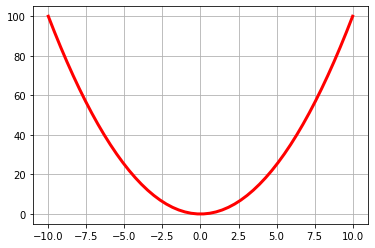

In [11]:
plt.figure(figsize=(6,4))
plt.plot(x_num, x_num**2, lw=3, c='r')
plt.grid()
plt.show()

### Selección de Padres
Durante cada generación sucesiva, se selecciona una parte de la población existente para criar una nueva generación. Las soluciones individuales se seleccionan a través de un proceso basado en la aptitud. Como estamos en la generación 0, no tenemos descendencia. Seleccionamos a los padres de nuestra población generada aleatoriamente. Existen tres métodos principales para definir los individuos que mejor se adaptan y seleccionarlos para la reproducción.

>**Selección aleatoria:** Esta es la forma más simple e ineficiente de seleccionar a los padres. En este método, barajamos la población realizando una permutación y seleccionamos a los dos primeros individuos como progenitores para la reproducción. Este método no se recomienda porque no sigue la "Teoría de la evolución de Darwin por selección natural", en la que los individuos se seleccionan en función de su aptitud, no al azar.

>**Torneo de selección:** Este método se basa en la probabilidad de selección de cada individuo. Realizamos varios torneos entre un grupo de individuos seleccionados al azar, seleccionamos un individuo de cada grupo como ganador y nuevamente realizamos el torneo agrupando a los ganadores de la primera iteración, repetimos el proceso hasta que converjamos en dos padres ganadores para la reproducción. El mejor miembro de cada grupo en cada iteración tiene la mayor probabilidad de selección.

>**Selección de la rueda de la ruleta:** este es un método ampliamente utilizado y más eficiente para seleccionar a los padres; por lo tanto, lo usaremos hoy en nuestro algoritmo. Todos sabemos cómo funciona la rueda de la ruleta en los casinos, dejar caer la bola, girar la rueda y esperar hasta que la rueda se detenga para ver en qué bote cae la bola. Profundicemos en la parte de implementación.


In [12]:
# Selección aleatoria
q = np.random.permutation(npop)
p1 = population[q[0]]
p2 = population[q[1]]

#### Slección por ruleta
La única diferencia entre la rueda de la ruleta del casino y el método de la rueda de la ruleta para la selección de padres es que en la rueda de la ruleta del casino, cada bote tiene la misma probabilidad de retener la bola cuando la rueda deja de girar. Sin embargo, aquí definimos la probabilidad para cada bote (individuo de la población). La probabilidad de cada individuo se llama aptitud del individuo.

Tenemos cuatro padres P1, P2, P3 y P4, con la probabilidad de ser seleccionados para reproducirse 0.1, 0.2, 0.3, 0.4, respectivamente. La flecha se fija en un lugar y la rueda gira. Cuando la rueda deja de girar, el progenitor al que apunta la flecha se elige para reproducirse; cuanto mayor sea la probabilidad, mayor será el área de la rueda, lo que dará lugar a una mayor probabilidad de ser seleccionado.

Ahora, ¿cómo implementamos la rueda de la ruleta programáticamente? Abrimos la rueda en una línea uniforme y dividimos la línea en el número de padres en la población, y cada padre ocupa el espacio en la línea igual a su probabilidad de ser seleccionado, y cada punto de corte es la suma acumulada de probabilidad. Generar un número aleatorio entre 0 y 1 actuará como la flecha que selecciona al padre para reproducirse. Aquí, el número aleatorio es 0,28; por lo tanto, el ganador es P2.

Para hacerlo aún más simple, calculamos la suma acumulada de probabilidad de cada padre, multiplicamos su suma con un número generado aleatoriamente. Luego obtenga el índice del primer padre cuyo valor acumulativo sea mayor que el número aleatorio. Por ejemplo, P1 tiene un valor acumulativo de 0,1, P2 tiene 0,3, P3 tiene 0,6 y P4 tiene 1. Si el número aleatorio generado es 0,28, entonces el primer padre cuyo valor acumulativo es mayor que 0,28 es P2, por lo tanto, el padre ganador para cría. La función argwhere() devuelve una matriz de verdaderos y falsos según la expresión pasada como parámetro.

In [13]:
def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]


Calculamos la probabilidad de cada padre por el exponencial de beta negativo por costos, donde beta es un número entero predefinido y costos es el costo de cada padre dividido por el costo promedio de todos los padres en la población.

```
# Calculating probability for roulette wheel selection
beta = 1
for i in range(len(population)):
   # list of all the population cost
   costs.append(population[i]['cost'])
costs = np.array(costs)
avg_cost = np.mean(costs)
if avg_cost != 0:
   costs = costs/avg_cost
probs = np.exp(-beta*costs)
```

### Crossover

Ahora que tenemos a nuestros dos padres para la reproducción, el siguiente paso es realizar el cruzamiento/apareamiento/reproducción. El cruce se refiere al proceso en el que ciertos genes de ambos cromosomas de los padres se superponen, se mezclan o se intercambian para producir una nueva descendencia. Dado que la descendencia es el resultado del cruce de los cromosomas de los padres, hereda las características de ambos padres. Hay tres métodos para realizar el cruce.

> **Cruce de un solo punto:** en este método, ambos cromosomas principales se cortan en el mismo punto aleatorio y las partes sobrantes se intercambian para producir dos nuevos cromosomas descendientes. Los genes de color amarillo representan la parte de corte del cromosoma.

>**Cruce de dos puntos:** un método similar al cruce de un solo punto, pero la única diferencia es que los cromosomas originales se cortan en dos puntos aleatorios. Nuevamente, la parte cortada de color amarillo del cromosoma se intercambia.

>**Cruce uniforme:** primero elegimos aleatoriamente qué genes se supone que se heredan de los cromosomas de los padres y los genes que no se heredan se marcan en color amarillo. Luego, los modelamos como 0 y 1, que se escriben en color verde. El gen que se hereda se codifica como 1, y el gen que no se debe heredar se codifica como 0. Esta serie de 0 y 1 se denominará alfa de ahora en adelante. Multiplique el valor del gen con el valor alfa correspondiente para ambos padres y luego sume los resultados para generar un solo gen del cromosoma descendiente. Consideremos el primer gen de cada cromosoma padre. Para el padre-1, el valor del gen es 1 y el valor alfa correspondiente también es 1; por lo tanto, 1x1=1. Para el padre-2, el valor del gen es 0 y el valor alfa correspondiente también es 0, por lo tanto, 0x0=0. El primer gen del cromosoma de la descendencia es 1+0=1, y así sucesivamente; de ​​esta manera, obtenemos la descendencia-1, para reproducir la descendencia-2, tomamos los valores complementarios de alfa y llevamos a cabo el mismo proceso.

Mediante programación, copiamos ambos padres en la variable secundaria: c1, c2. Genere aleatoriamente valores alfa distribuidos uniformemente entre 0 y 1, que es la forma (posición) del cromosoma principal. El resto del proceso sigue siendo el mismo, excepto que, en teoría, tomamos el complemento de valores alfa para producir descendencia-2, mientras que, en el programa, intercambiamos los padres mientras multiplicamos con alfa, que es lo mismo que tomar el complemento de valores alfa.

In [14]:
def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position'] 
    return c1, c2

### Mutación
La mutación es un proceso natural que ocurre debido a un error en la replicación o copia de genes. Mientras realizamos el cruce, replicamos los cromosomas de los padres mediante la combinación de genes de ambos padres. No hay garantía de que la copia del gen original sea 100 % precisa. Siempre ocurre un error, lo que conduce al alcance de la exploración. Por ejemplo, si ambos padres tienen ojos marrones y ojos azules, probablemente se deba a una mutación que ocurrió debido a un error al copiar los genes de sus padres, y su generación posterior podría transmitir esa característica.

La mutación del cromosoma en el algoritmo genético es necesaria porque puede generar resultados revolucionarios que ayudarán a resolver nuestro problema de manera más eficiente. Entonces, tenemos tres parámetros: el cromosoma hijo (c), la tasa de mutación (mu) y el tamaño del paso (sigma). La tasa de mutación (mu) determina el porcentaje del cromosoma infantil que sufre mutación.

Para definir qué genes se mutarán, generamos números aleatorios y los comparamos con la tasa de mutación, luego encontramos los índices del cromosoma hijo (posición) que tienen valores menores que la tasa de mutación usando la función argwhere(). Reemplace esos índices con genes nuevos (mutados) generados al multiplicar el tamaño de paso (sigma) con un valor generado aleatoriamente y agregarlo al gen original.


In [15]:
def mutate(c, mu, sigma):
    # mu - mutation rate. % of gene to be modified
    # sigma - step size of mutation
    # mutation = original gene + (step size * random number)   
    y = copy.deepcopy(c)   
    # array of True and Flase, indicating the mutation position
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y

### Evaluando la Descendencia

Una vez que los descendientes experimentan la mutación, debemos evaluarlos con la función de costo para definir su aptitud. Además, reemplace la mejor solución en cada generación/iteración.

```
# Evaluate first off spring
# calculate cost function of child 1
c1['cost'] = costfunc(c1['position'])
if type(bestsol_cost) == float:
  # replacing best solution in every generation/iteration
  if c1['cost'] < bestsol_cost:
    bestsol_cost = copy.deepcopy(c1)
else:
   # replacing best solution in every generation/iteration
   if c1['cost'] < bestsol_cost['cost']:
     bestsol_cost = copy.deepcopy(c1)
# Evaluate second off spring
if c2['cost'] < bestsol_cost['cost']:
bestsol_cost = copy.deepcopy(c2)
```

### Fusionar descendientes con la población principal y ordenar

La fusión de los descendientes es vital para que sean considerados como padres para reproducir la próxima generación. Al clasificar la nueva población, tenemos mejores individuos en la parte superior. Dado que el tamaño de la población sigue siendo el mismo que en la primera iteración (npop), el número de individuos en la parte inferior de la población clasificada igual al número de nuevos descendientes producidos en la iteración anterior se eliminan del proceso de selección para criar nuevos descendientes, y el proceso continúa: así es como se lleva a cabo el proceso de eliminación.

In [16]:
def bounds(c, varmin, varmax):
    ''' Defines the upper and lower bound of gene value'''

    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)

In [18]:
def sort(arr):
    n=len(arr)
    for i in range(n-1):
        for j in range(0,n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

### Función principal para AG

In [21]:
def ga(costfun, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta):
    
    #inicializar la población
    population={}
    for i in range(npop):
        population[i] = {'position': None, 'cost':None} 
    
    bestsol = copy.deepcopy(population)
    bestsol_cost = np.inf
        
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        population[i]['cost'] = costfun(population[i]['position'])
        
        if population[i]['cost'] < bestsol_cost:
            bestsol = copy.deepcopy(population[i])
    
    print('best_sol: {}'.format(bestsol))
    
    bestcost = np.empty(maxit)
    bestsolution = np.empty((maxit,num_var))
    
    for it in range(maxit):
        #calcular las probabilidades de la ruleta
        costs=[]
        for i in range(len(population)):
            costs.append(population[i]['cost'])
        costs = np.array(costs)
        avg_cost = np.mean(costs)

        if avg_cost !=0:
            costs = costs/avg_cost

        props = np.exp(-beta*costs)
        
        for _ in range(num_children//2):
            
            # selección por ruleta
            p1 = population[roulette_wheel_selection(props)]
            p2 = population[roulette_wheel_selection(props)]
            
            # Crossover de los padres
            c1, c2 = crossover(p1,p2)
            
            # Realizar la mutación
            c1=mutate(c1,mu,sigma)
            c2=mutate(c2,mu,sigma)
            
            bounds(c1, varmin, varmax)
            bounds(c2, varmin, varmax)
            
            #evaluar la función de costo
            c1['cost'] = costfun(c1['position'])
            c2['cost'] = costfun(c2['position'])
            
            if type(bestsol_cost)==float:
                if c1['cost']<bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                if c1['cost']<bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)

            if c2['cost']<bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
                
        #juntar la poblacion de la generación anterior con la nueva
        population[len(population)] = c1
        population[len(population)] = c2
        
        population = sort(population)
        
        #almacenar el history
        bestcost[it] = bestsol_cost['cost']
        bestsolution[it] = bestsol_cost['position']
        
        print('iteración {}, best_sol {}, best_cost {}'.format(it,bestsolution[it],bestcost[it]))
        
    out = population
    return (out, bestsolution, bestcost)

best_sol: {'position': array([-9.8908504 ,  6.08626278]), 'cost': 134.87151628017244}
iteración 0, best_sol [-1.0644971  -1.30485717], best_cost 2.8358063023175593
iteración 1, best_sol [-0.49173264  0.75383279], best_cost 0.8100648644875525
iteración 2, best_sol [-0.49173264  0.75383279], best_cost 0.8100648644875525
iteración 3, best_sol [-0.49173264  0.75383279], best_cost 0.8100648644875525
iteración 4, best_sol [-0.49173264  0.75383279], best_cost 0.8100648644875525
iteración 5, best_sol [-0.49173264  0.75383279], best_cost 0.8100648644875525
iteración 6, best_sol [-0.49173264  0.75383279], best_cost 0.8100648644875525
iteración 7, best_sol [-0.70231679  0.52161989], best_cost 0.7653361837769003
iteración 8, best_sol [-0.70231679  0.52161989], best_cost 0.7653361837769003
iteración 9, best_sol [-0.70231679  0.52161989], best_cost 0.7653361837769003
iteración 10, best_sol [-0.70231679  0.52161989], best_cost 0.7653361837769003
iteración 11, best_sol [-0.36754495 -0.43440431], best_

iteración 122, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 123, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 124, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 125, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 126, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 127, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 128, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 129, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 130, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 131, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 132, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iteración 133, best_sol [-0.0553829   0.04117472], best_cost 0.0047626239054213565
iter

iteración 225, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 226, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 227, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 228, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 229, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 230, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 231, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 232, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 233, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 234, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 235, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 236, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 237, b

iteración 326, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 327, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 328, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 329, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 330, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 331, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 332, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 333, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 334, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 335, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 336, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 337, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 338, b

iteración 428, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 429, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 430, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 431, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 432, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 433, best_sol [-0.04315605 -0.00777068], best_cost 0.001922828187543856
iteración 434, best_sol [ 0.00943621 -0.0284742 ], best_cost 0.0008998222416039785
iteración 435, best_sol [ 0.00943621 -0.0284742 ], best_cost 0.0008998222416039785
iteración 436, best_sol [ 0.00943621 -0.0284742 ], best_cost 0.0008998222416039785
iteración 437, best_sol [ 0.00943621 -0.0284742 ], best_cost 0.0008998222416039785
iteración 438, best_sol [ 0.00943621 -0.0284742 ], best_cost 0.0008998222416039785
iteración 439, best_sol [ 0.00943621 -0.0284742 ], best_cost 0.0008998222416039785
iteración 

<function matplotlib.pyplot.show(close=None, block=None)>

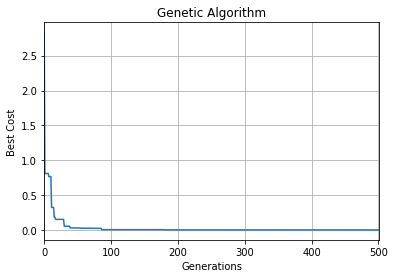

In [22]:
# Problem definition
costfunc = sphere
num_var = 2       # number of decicion variables
varmin = -10      # lower bound
varmax = 10       # upper bound

# GA Parameters
maxit = 501                                              # number of iterations
npop = 20                                                # initial population size
beta = 1
prop_children = 1                                        # proportion of children to population
num_children = int(np.round(prop_children * npop/2)*2)   # making sure it always an even number
mu = 0.2                                                 # mutation rate 20%, 205 of 5 is 1, mutating 1 gene
sigma = 0.1                                              # step size of mutation


# Run GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show

In [23]:
solucion = out[1]
solucion

array([[-1.0644971 , -1.30485717],
       [-0.49173264,  0.75383279],
       [-0.49173264,  0.75383279],
       ...,
       [ 0.00943621, -0.0284742 ],
       [ 0.00943621, -0.0284742 ],
       [ 0.00943621, -0.0284742 ]])

### Otro ejemplo

In [24]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
def f2(x,y):
    return x**2+y**2
def f3(x,y):
    return (x-2)**2 + x*y + (y-2)**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z1 = f(X, Y)
Z2 = f2(X,Y)
Z3= f3(X,Y)

Text(0.5, 0, 'z')

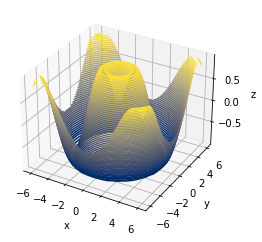

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z1, 50, cmap=plt.cm.cividis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

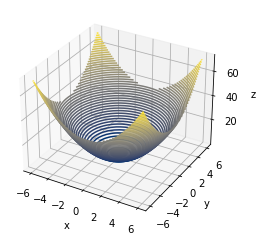

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z2, 50, cmap=plt.cm.cividis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

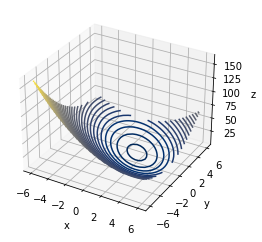

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z3, 50, cmap=plt.cm.cividis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [28]:
# cost function
def parab3d(x):
    return x[0]**2+x[1]**2

best_sol: {'position': array([3.42817785, 7.57918382]), 'cost': 69.19643066868313}
iteración 0, best_sol [-1.62940816 -1.93457223], best_cost 6.397540699995474
iteración 1, best_sol [-1.62940816 -1.93457223], best_cost 6.397540699995474
iteración 2, best_sol [-1.18491599  0.14893769], best_cost 1.4262083378616501
iteración 3, best_sol [-1.18491599  0.14893769], best_cost 1.4262083378616501
iteración 4, best_sol [-1.18491599  0.14893769], best_cost 1.4262083378616501
iteración 5, best_sol [-1.18491599  0.14893769], best_cost 1.4262083378616501
iteración 6, best_sol [-1.18491599  0.14893769], best_cost 1.4262083378616501
iteración 7, best_sol [-1.18491599  0.14893769], best_cost 1.4262083378616501
iteración 8, best_sol [-1.16830581  0.16466857], best_cost 1.3920541965383888
iteración 9, best_sol [-1.16830581  0.16466857], best_cost 1.3920541965383888
iteración 10, best_sol [-1.16830581  0.16466857], best_cost 1.3920541965383888
iteración 11, best_sol [-0.27933536 -0.864166  ], best_cost 

iteración 102, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 103, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 104, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 105, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 106, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 107, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 108, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 109, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 110, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 111, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 112, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 113, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 114, best_sol [-0.

iteración 204, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 205, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 206, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 207, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 208, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 209, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 210, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 211, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 212, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 213, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 214, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 215, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 216, best_sol [-0.

iteración 307, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 308, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 309, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 310, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 311, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 312, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 313, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 314, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 315, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 316, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 317, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 318, best_sol [-0.00449947  0.18978012], best_cost 0.03603673830346201
iteración 319, best_sol [-0.

iteración 410, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 411, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 412, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 413, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 414, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 415, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 416, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 417, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 418, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 419, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 420, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 421, best_sol [-0.14434753 -0.02647555], best_cost 0.021537165386174128
iteración 422, b

<function matplotlib.pyplot.show(close=None, block=None)>

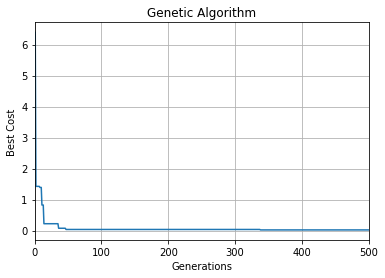

In [29]:
# Problem definition
costfunc = parab3d
num_var = 2       # number of decicion variables
varmin = -10      # lower bound
varmax = 10       # upper bound

# GA Parameters
maxit = 501                                              # number of iterations
npop = 20                                                # initial population size
beta = 1
prop_children = 1                                        # proportion of children to population
num_children = int(np.round(prop_children * npop/2)*2)   # making sure it always an even number
mu = 0.5                                                 # mutation rate 20%, 205 of 5 is 1, mutating 1 gene
sigma = 0.1                                              # step size of mutation


# Run GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show

In [30]:
out[2][-1]

0.021537165386174128

In [31]:
out[1][-1][0],out[1][-1][1]

(-0.14434753337360604, -0.026475554670862295)

Text(0.5, 0, 'z')

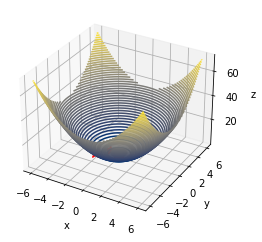

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z2, 50, cmap=plt.cm.cividis)
for i in range(out[1].shape[0]):
    if i%10 ==0:
        plt.plot(out[1][i][0],out[1][i][1], out[2][i], '*r', ms=10)
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Otro ejemplo

In [33]:
# cost function
def convex1(x):
    return (x[0]-2)**2+(x[1]-2)**2+x[0]*x[1]

best_sol: {'position': array([-6.3420995 ,  4.07595465]), 'cost': 48.05010180700315}
iteración 0, best_sol [2.4532601  0.39122503], best_cost 3.7533783746251776
iteración 1, best_sol [0.77942869 0.78968531], best_cost 3.570159363346514
iteración 2, best_sol [0.77942869 0.78968531], best_cost 3.570159363346514
iteración 3, best_sol [0.77942869 0.78968531], best_cost 3.570159363346514
iteración 4, best_sol [0.77942869 0.78968531], best_cost 3.570159363346514
iteración 5, best_sol [0.77942869 0.78968531], best_cost 3.570159363346514
iteración 6, best_sol [0.77942869 0.78968531], best_cost 3.570159363346514
iteración 7, best_sol [0.54342137 1.4508481 ], best_cost 3.2116109857690995
iteración 8, best_sol [0.54342137 1.4508481 ], best_cost 3.2116109857690995
iteración 9, best_sol [0.54342137 1.4508481 ], best_cost 3.2116109857690995
iteración 10, best_sol [1.38515151 1.32960545], best_cost 2.6691725149504952
iteración 11, best_sol [1.38515151 1.32960545], best_cost 2.6691725149504952
iteraci

iteración 121, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 122, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 123, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 124, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 125, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 126, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 127, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 128, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 129, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 130, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 131, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 132, best_sol [1.35869943 1.33452119], best_cost 2.6673416479502152
iteración 133, best_sol [1.35869943 1.33452119], best_cost 2.667

iteración 227, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 228, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 229, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 230, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 231, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 232, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 233, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 234, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 235, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 236, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 237, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 238, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887
iteración 239, best_sol [1.31590463 1.32427711], best_cost 2.667210279958887

<function matplotlib.pyplot.show(close=None, block=None)>

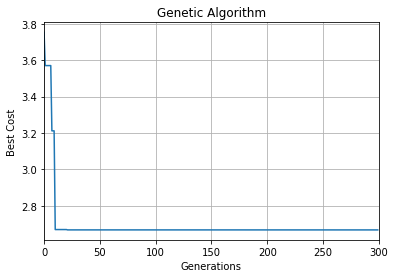

In [34]:
# Problem definition
costfunc = convex1
num_var = 2       # number of decicion variables
varmin = -10      # lower bound
varmax = 10       # upper bound

# GA Parameters
maxit = 300                                              # number of iterations
npop = 10                                                # initial population size
beta = 2
prop_children =  1                                       # proportion of children to population
num_children = int(np.round(prop_children * npop/2)*2)   # making sure it always an even number
mu = 0.6                                                 # mutation rate 20%, 205 of 5 is 1, mutating 1 gene
sigma = 0.1                                              # step size of mutation


# Run GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show

Text(0.5, 0, 'z')

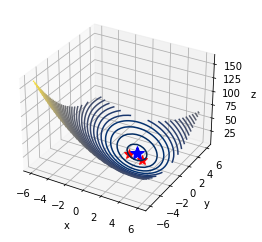

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z3, 50, cmap=plt.cm.cividis)
for i in range(out[1].shape[0]):
    if i%5 ==0:
        plt.plot(out[1][i][0],out[1][i][1], out[2][i], '*r', ms=10)
plt.plot(out[1][i][0],out[1][i][1], out[2][i], '*b', ms=15)
        
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [36]:
convex1(out[1][-1])

2.667210279958887